## Observations and Insights 

In [14]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [15]:
# Delete duplicates from data
mouse_metadata = mouse_metadata.drop_duplicates(subset=None, keep='first', inplace=False)
study_results = study_results.drop_duplicates(subset=None, keep='first', inplace=False)

In [19]:
print(mouse_metadata.dtypes)
print(study_results.dtypes)

Mouse ID        object
Drug Regimen    object
Sex             object
Age_months       int64
Weight (g)       int64
dtype: object
Mouse ID               object
Timepoint               int64
Tumor Volume (mm3)    float64
Metastatic Sites        int64
dtype: object


In [21]:
# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, how = 'left', on=['Mouse ID', 'Mouse ID'])
mouse_results.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [24]:
# Checking the number of mice in the DataFrame.
len(mouse_results['Mouse ID'].unique())

249

In [41]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_dups = mouse_results
mouse_dups['Dup'] = mouse_results.duplicated(subset=['Mouse ID', 'Timepoint'])
mouse_dups = mouse_dups[mouse_dups['Dup']==True]
mouse_dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dup
910,g989,Propriva,Female,21,26,5,47.570392,0,True
912,g989,Propriva,Female,21,26,10,49.880528,0,True
914,g989,Propriva,Female,21,26,15,53.442020,0,True
916,g989,Propriva,Female,21,26,20,54.657650,1,True


In [43]:
# Optional: Get all the data for the duplicate mouse ID. 
#above
mouse_g989 = mouse_results[mouse_results['Mouse ID'] == 'g989']
mouse_g989

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dup
908,g989,Propriva,Female,21,26,0,45.000000,0,False
909,g989,Propriva,Female,21,26,5,48.786801,0,False
910,g989,Propriva,Female,21,26,5,47.570392,0,True
911,g989,Propriva,Female,21,26,10,51.745156,0,False
912,g989,Propriva,Female,21,26,10,49.880528,0,True
913,g989,Propriva,Female,21,26,15,51.325852,1,False
914,g989,Propriva,Female,21,26,15,53.442020,0,True
915,g989,Propriva,Female,21,26,20,55.326122,1,False
916,g989,Propriva,Female,21,26,20,54.657650,1,True
917,g989,Propriva,Female,21,26,25,56.045564,1,False


In [44]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_clean = mouse_results[mouse_results['Mouse ID'] != 'g989']
mouse_clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Dup
0,k403,Ramicane,Male,21,16,0,45.000000,0,False
1,k403,Ramicane,Male,21,16,5,38.825898,0,False
2,k403,Ramicane,Male,21,16,10,35.014271,1,False
3,k403,Ramicane,Male,21,16,15,34.223992,1,False
4,k403,Ramicane,Male,21,16,20,32.997729,1,False
...,...,...,...,...,...,...,...,...,...
1887,z969,Naftisol,Male,9,30,25,63.145652,2,False
1888,z969,Naftisol,Male,9,30,30,65.841013,3,False
1889,z969,Naftisol,Male,9,30,35,69.176246,4,False
1890,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [47]:
# Checking the number of mice in the clean DataFrame.
len(mouse_clean['Mouse ID'].unique())

248

## Summary Statistics

In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.

#['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin','Stelasyn', 'Zoniferol', 'Ketapril', 'Propriva', 'Naftisol']

#found a simpler way, just couldn't let this code go! 
drug_list = mouse_clean['Drug Regimen'].unique()
df = []
df2 = []


describe = mouse_clean[mouse_clean['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)'].describe()
df = pd.DataFrame(describe)

for drug in drug_list:
    print(drug)
    describe = mouse_clean[mouse_clean['Drug Regimen'] == drug]['Tumor Volume (mm3)'].describe()
    df2 = pd.DataFrame(describe)
    df = df.merge(df2)
    print(df)

df    

Ramicane
   Tumor Volume (mm3)
0          228.000000
1           40.216745
2            4.846308
3           22.050126
4           36.674635
5           40.673236
6           45.000000
7           47.622816
Capomulin
   Tumor Volume (mm3)
0                45.0
Infubinol
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Placebo
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Ceftamin
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Stelasyn
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Zoniferol
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Ketapril
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Propriva
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []
Naftisol
Empty DataFrame
Columns: [Tumor Volume (mm3)]
Index: []


,Tumor Volume (mm3)


In [99]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
mouse_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar Plots

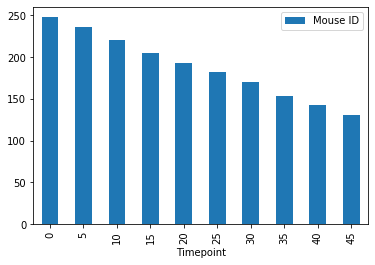

In [130]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
bar_1 = mouse_clean.groupby(['Timepoint']).count()
bar_1 = bar_1.reset_index()

bar_1.plot.bar('Timepoint', 'Mouse ID')

Text(0, 0.5, 'Number Mice')

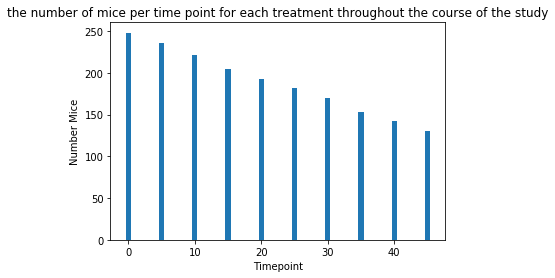

In [121]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
import numpy as np

bar_1 = mouse_clean.groupby(['Timepoint']).count()
bar_1

x_axis = np.arange(0,46,5)

plt.bar(x_axis, bar_1['Mouse ID'])

plt.title("the number of mice per time point for each treatment throughout the course of the study")
plt.xlabel("Timepoint")
plt.ylabel("Number Mice")


## Pie Plots

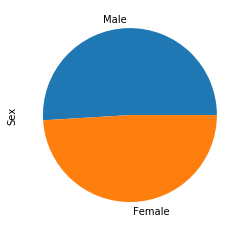

In [151]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pie_1 = mouse_clean['Sex'].value_counts()

pie_1.plot.pie()

([<matplotlib.patches.Wedge at 0x2852e06ea48>,
 [Text(-0.03308201408261547, 1.0995024239828841, ''),
  Text(0.033082014082615095, -1.0995024239828841, '')])

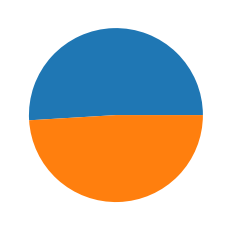

In [154]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie_2 = mouse_clean['Sex'].value_counts()
plt.pie(pie_2)

## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
